# 1. Realice un análisis exploratorio de los datos *Prestigio de las Ocupaciones Canadienses*. ¿Hay algún o algunos detalles que le llamen la atención?

Importación de librerías.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leer los datos del archivo `control1.dat` cuyas columnas están separadas por múltiples espacios.

In [2]:
df = pd.read_csv('control1.dat', sep='\s+')

Visualizar algunas entradas del conjunto de datos.

In [3]:
display(df)

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...,...
97,BUS.DRIVERS,7.58,5562,9.47,35.9,9171,bc
98,TAXI.DRIVERS,7.93,4224,3.59,25.1,9173,bc
99,LONGSHOREMEN,8.37,4753,0.00,26.1,9313,bc
100,TYPESETTERS,10.00,6462,13.58,42.2,9511,bc


Reetiquetar las variables

In [4]:
df.columns = ["Ocupación", "Educación", "Ingreso", "Mujeres", "Prestigio", "Censo", "Tipo"]

Ver cuántas ocupaciones diferentes hay.

In [38]:
print(len(df["Ocupación"].unique()))

101


In [52]:
import collections
print([item for item, count in collections.Counter(df["Censo"]).items() if count > 1])

print(df[df["Censo"] == 8215])

[8215]
         Ocupación  Educación  Ingreso  Mujeres  Prestigio  Censo    Tipo
70  SLAUGHTERERS.1       7.64     5134    17.26       25.2   8215  Obrero
71  SLAUGHTERERS.2       7.64     5134    17.26       34.8   8215  Obrero


Como el conjunto de datos tiene 102 entradas y como el arreglo `df["Ocupación"].unique()` tiene una longitud de 102 elementos, se concluye que no hay ocupaciones repetidas.

Ver cuántos tipos de ocupaciones hay

In [6]:
print(len(df["Tipo"].unique()))
print(df["Tipo"].unique())

4
['prof' 'bc' 'wc' nan]


Reetiquetar los tipos de ocupaciones

In [7]:
df.loc[df["Tipo"] == "prof", "Tipo"] = "Profesional, gerencial y técnico"
df.loc[df["Tipo"] == "bc", "Tipo"] = "Obrero"
df.loc[df["Tipo"] == "wc", "Tipo"] = "Oficinista"

Desplegar el porcentaje de valores nulos para cada variable del conjunto de datos

In [8]:
display(df.isnull().sum() / len(df))

Ocupación    0.000000
Educación    0.000000
Ingreso      0.000000
Mujeres      0.000000
Prestigio    0.000000
Censo        0.000000
Tipo         0.039216
dtype: float64

El 3.9216 % de entradas en el juego de datos tiene un valor nulo en el campo `Tipo`

Imprimir las estadísticas principales de las variables numéricas.

In [9]:
display(df.describe())

,Educación,Ingreso,Mujeres,Prestigio,Censo
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


Mapa de calor de la matriz de correlación obtenida a partir de los datos de las variables numéricas

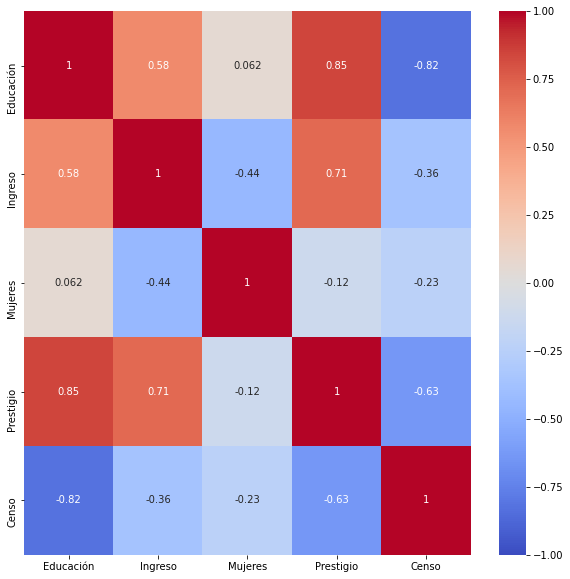

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

Función para graficar histogramas o diagramas de dispersión (dependiendo de si `x_col` es igual a `y_col` o no) a partir de los datos del DataFrame `df`, separando los datos dependiendo de los valores que tome la variable `label`

In [11]:
def plot(df, x_col, y_col, label, targets, colors):
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(x_col,fontsize=20)
    if x_col == y_col:
        plt.ylabel("Frecuencia", fontsize=20)
        plt.title("Histograma de " + x_col + " por tipo de ocupación",fontsize=20)
        
        kwargs = dict(alpha=0.6, bins=100)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            plt.hist(df.loc[indicesToKeep, x_col], color = color, alpha = 0.6, bins = 15)
    else:
        plt.ylabel(y_col, fontsize=20)
        plt.title(y_col + " vs. " + x_col,fontsize=20)

        for target, color in zip(targets,colors):
            indicesToKeep = df[label] == target
            plt.scatter(df.loc[indicesToKeep, x_col], 
                        df.loc[indicesToKeep, y_col], c = color, s = 100, alpha = 0.6)

        #for i, txt in enumerate(df["Ocupación"]):
        #    plt.annotate(txt, (df.loc[i, x_col]-0.65, df.loc[i, y_col]-0.05), fontsize = 6)
    
    plt.legend(targets,prop={'size': 15})
    plt.show()

<Figure size 432x288 with 0 Axes>

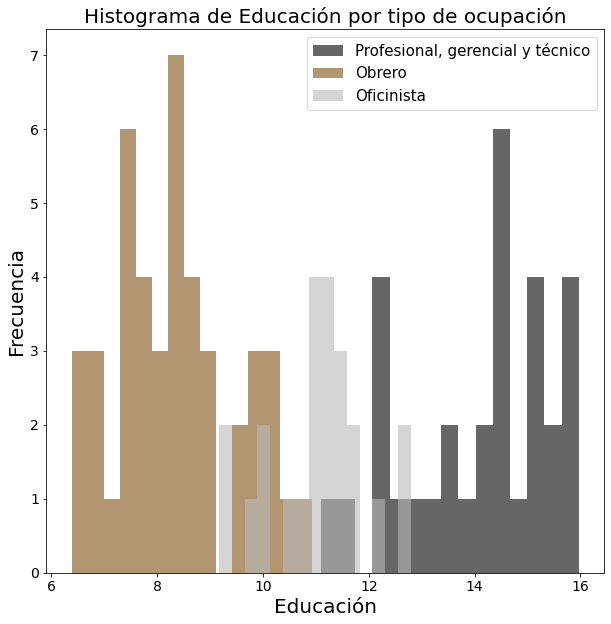

<Figure size 432x288 with 0 Axes>

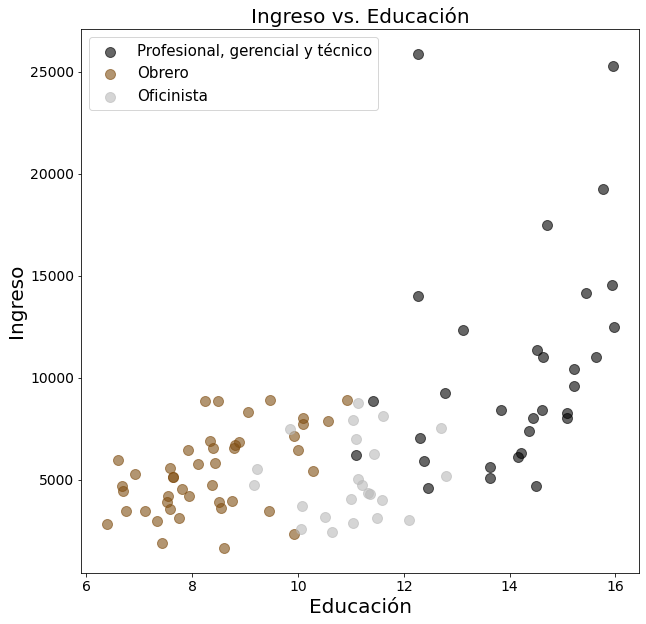

<Figure size 432x288 with 0 Axes>

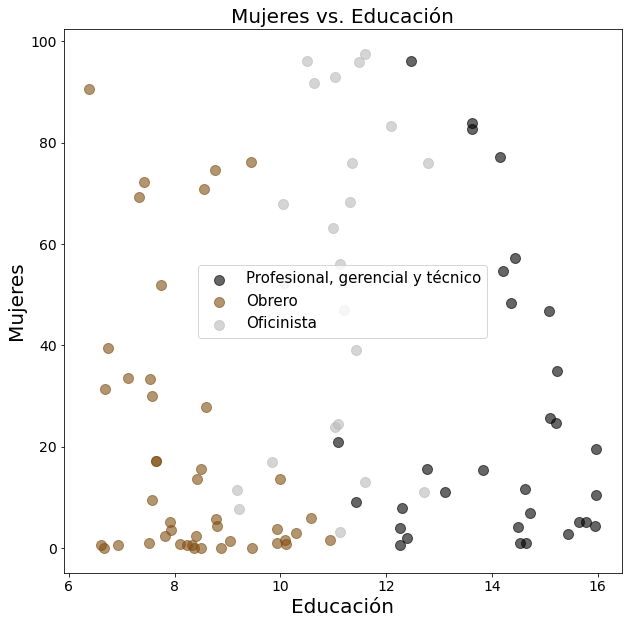

<Figure size 432x288 with 0 Axes>

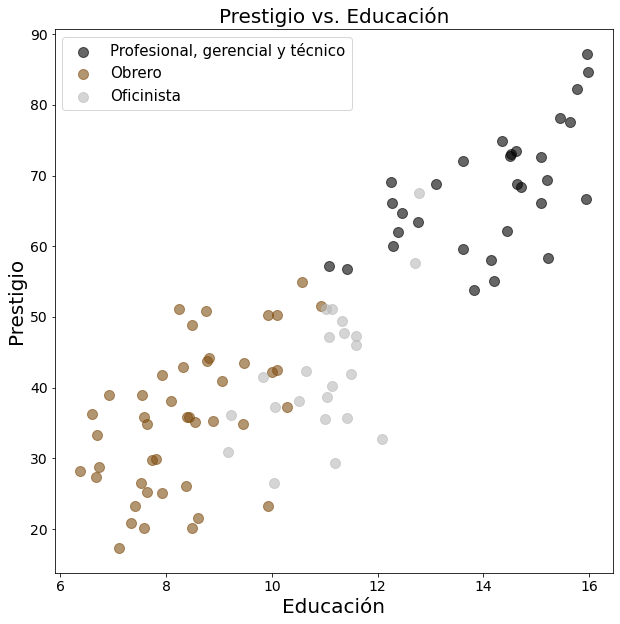

<Figure size 432x288 with 0 Axes>

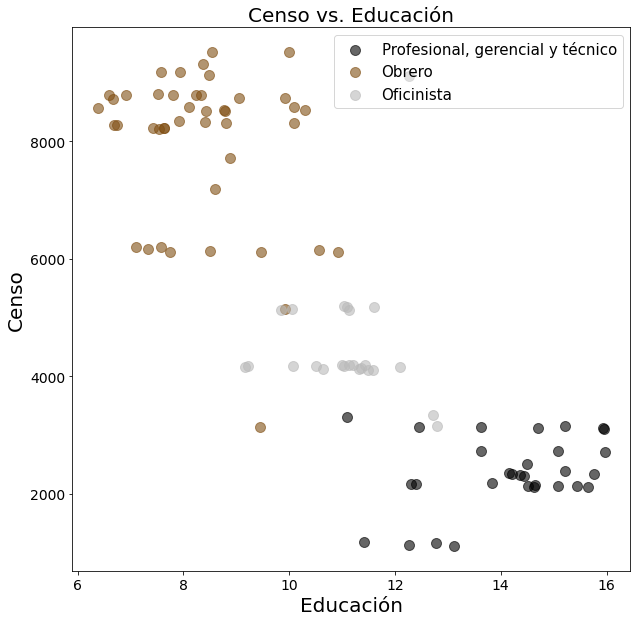

<Figure size 432x288 with 0 Axes>

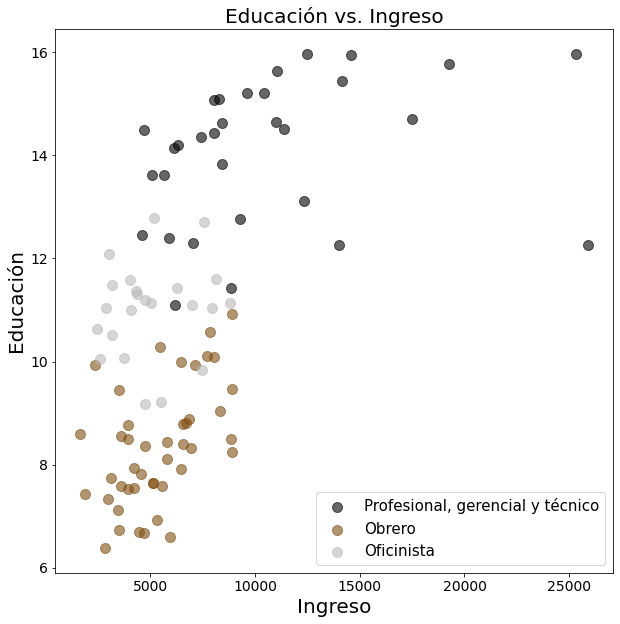

<Figure size 432x288 with 0 Axes>

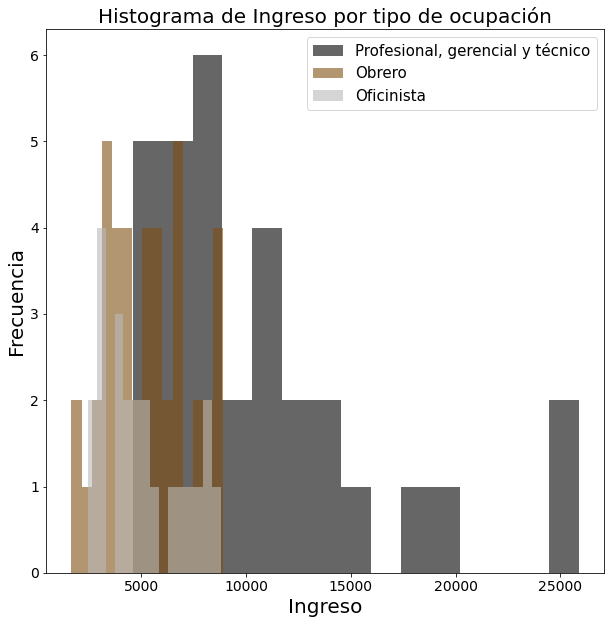

<Figure size 432x288 with 0 Axes>

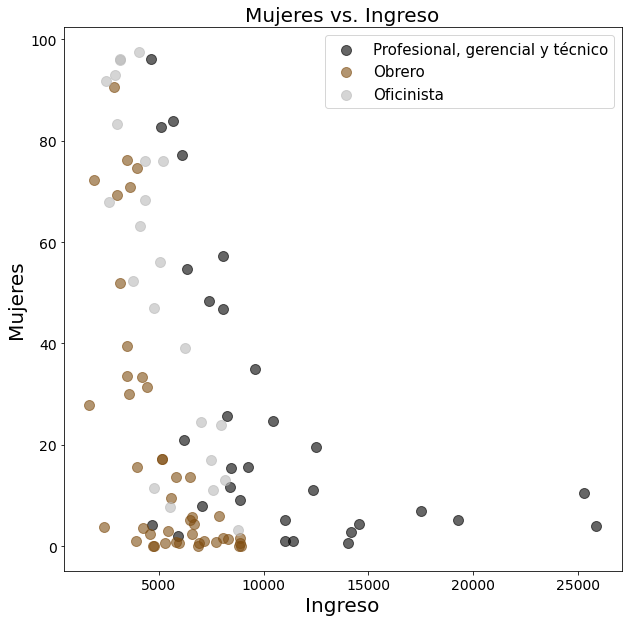

<Figure size 432x288 with 0 Axes>

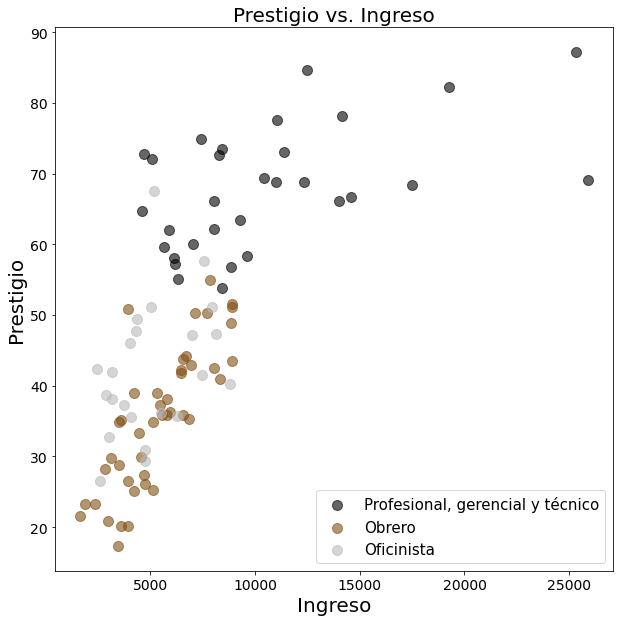

<Figure size 432x288 with 0 Axes>

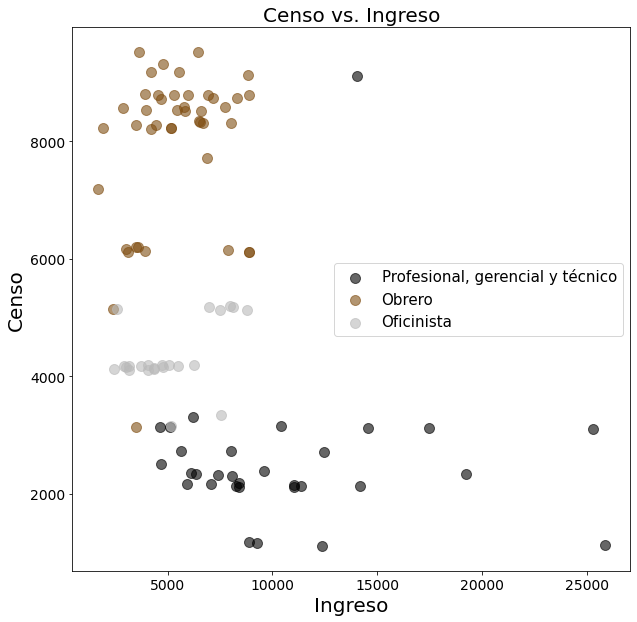

<Figure size 432x288 with 0 Axes>

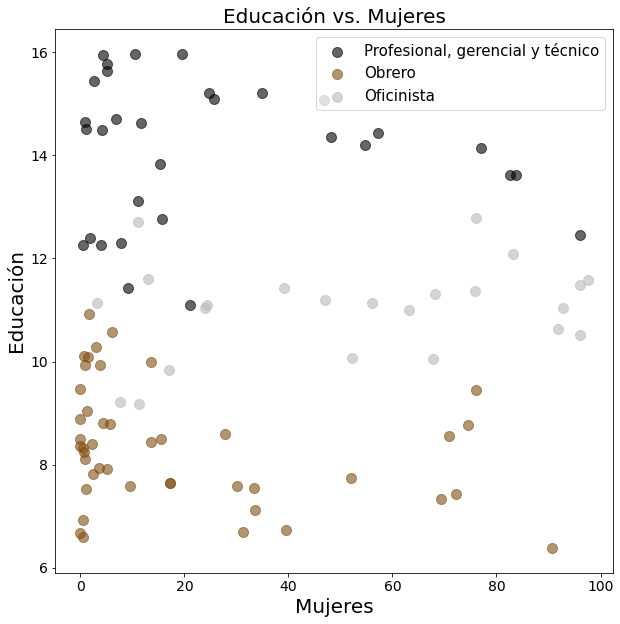

<Figure size 432x288 with 0 Axes>

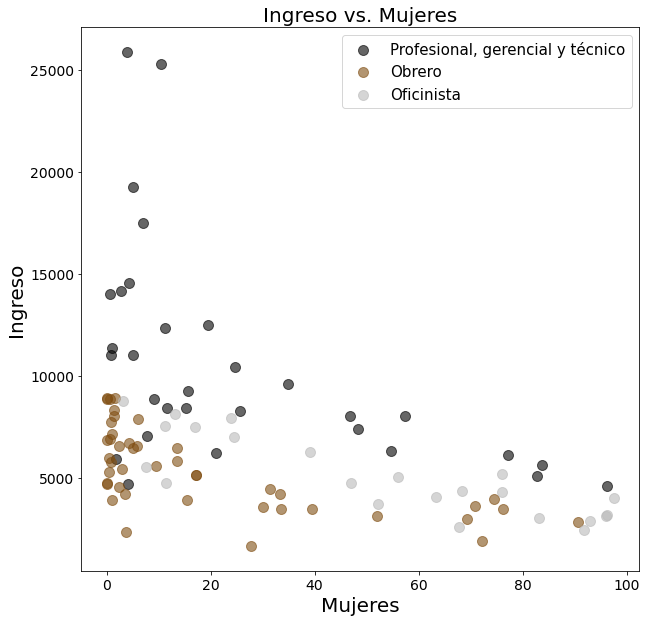

<Figure size 432x288 with 0 Axes>

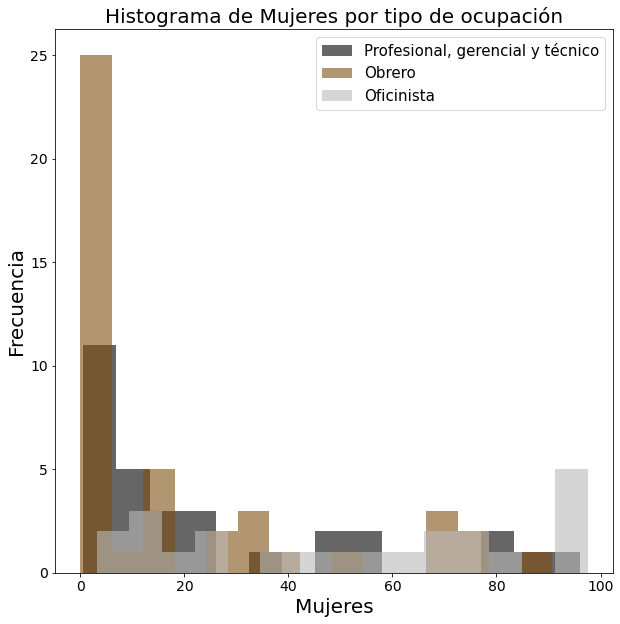

<Figure size 432x288 with 0 Axes>

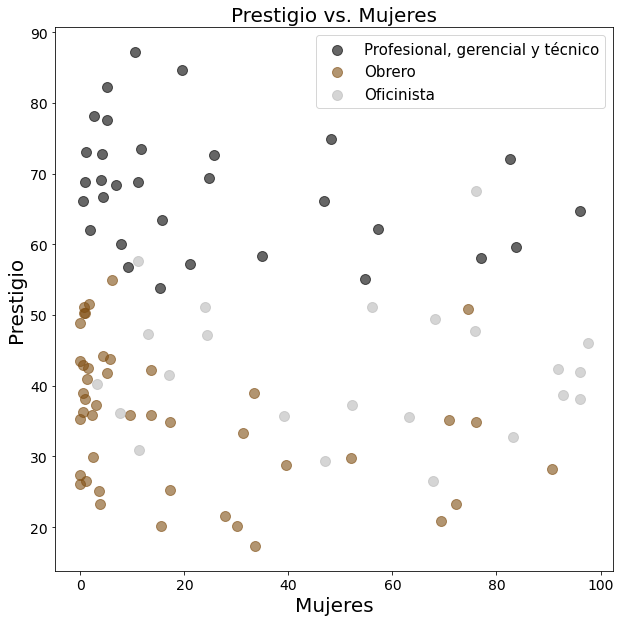

<Figure size 432x288 with 0 Axes>

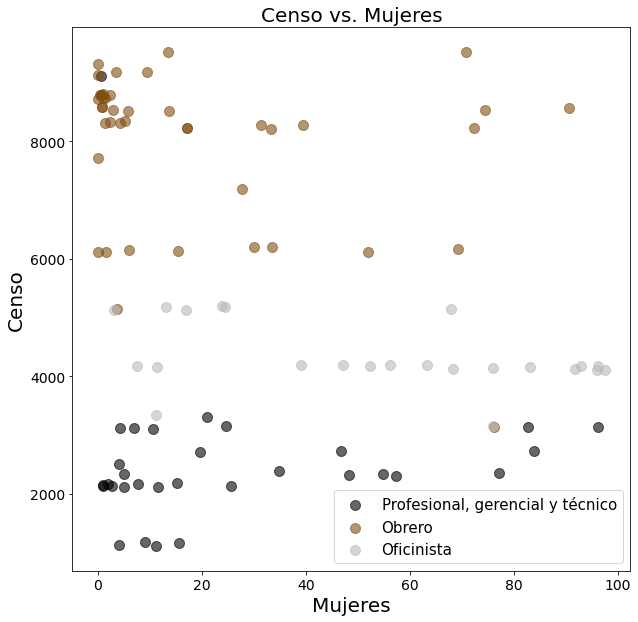

<Figure size 432x288 with 0 Axes>

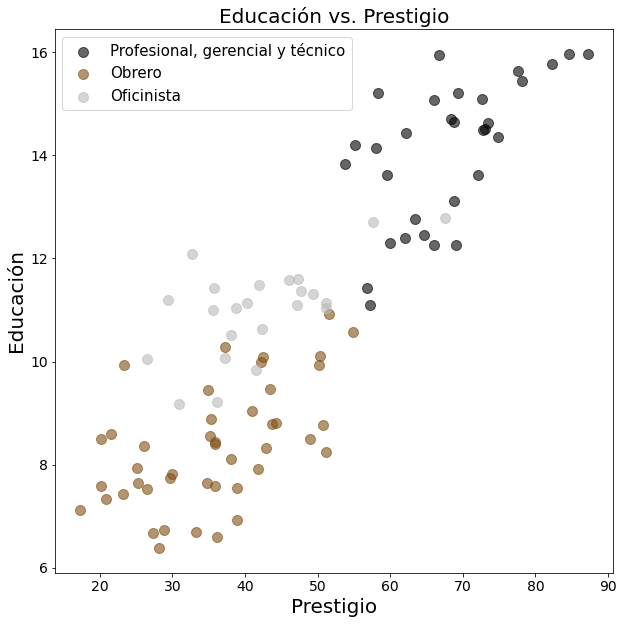

<Figure size 432x288 with 0 Axes>

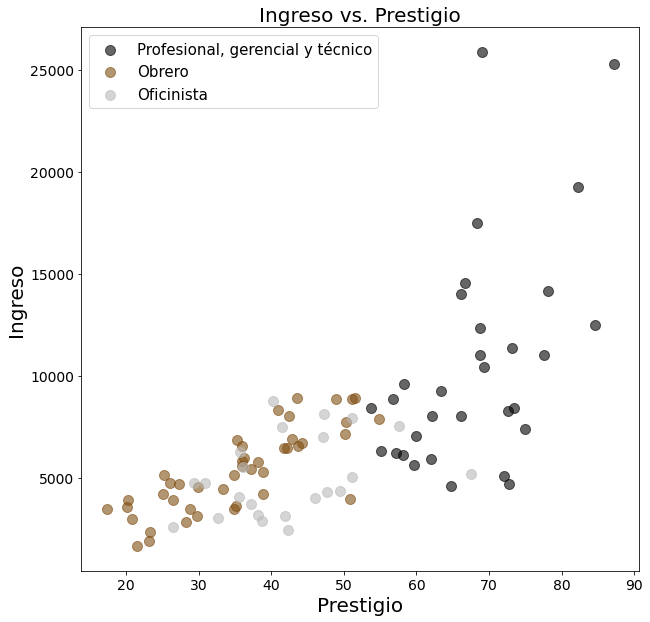

<Figure size 432x288 with 0 Axes>

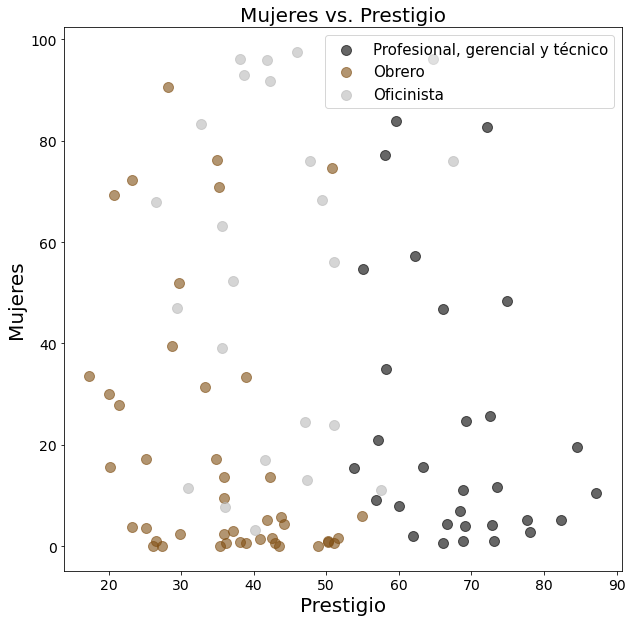

<Figure size 432x288 with 0 Axes>

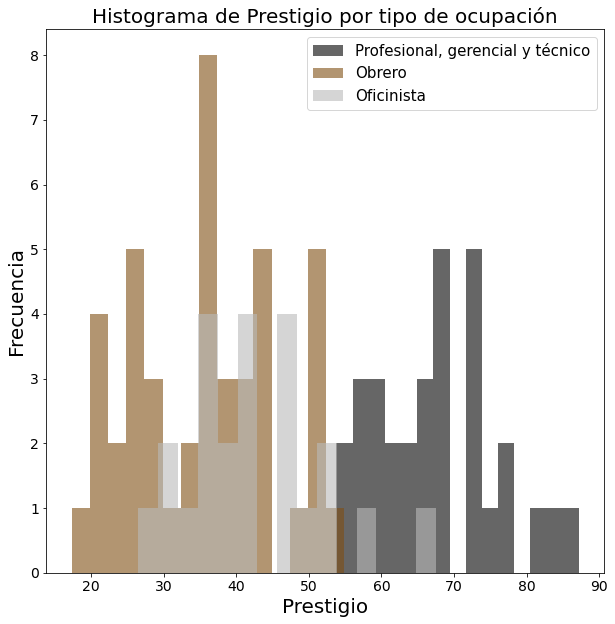

<Figure size 432x288 with 0 Axes>

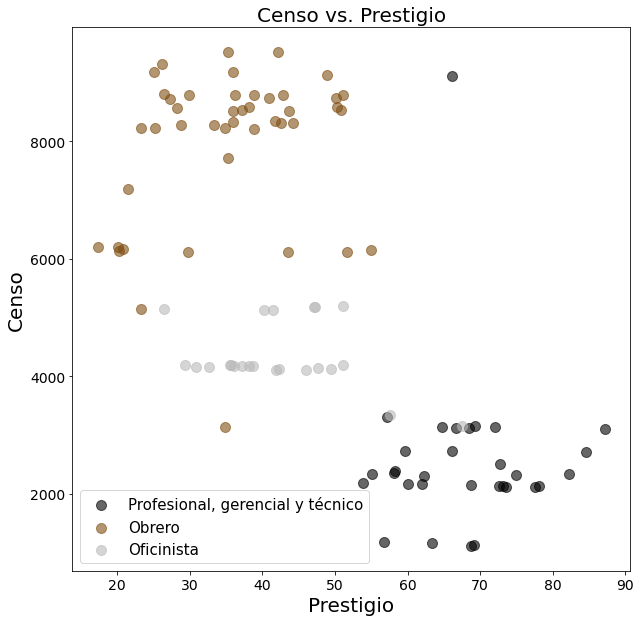

<Figure size 432x288 with 0 Axes>

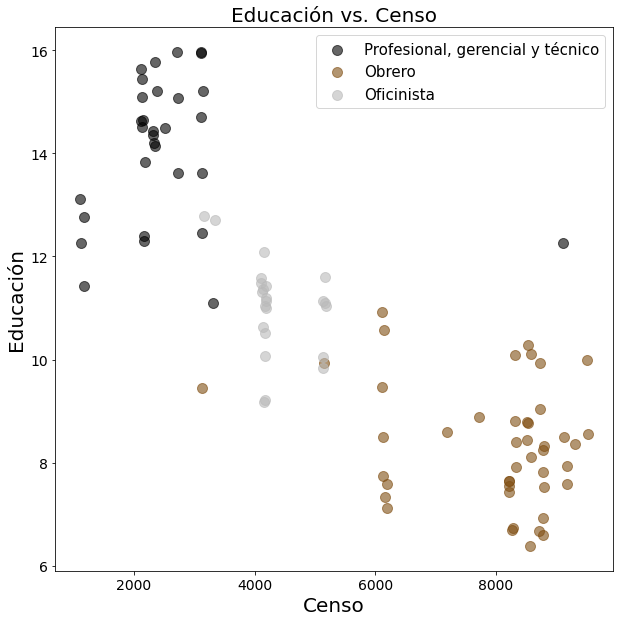

<Figure size 432x288 with 0 Axes>

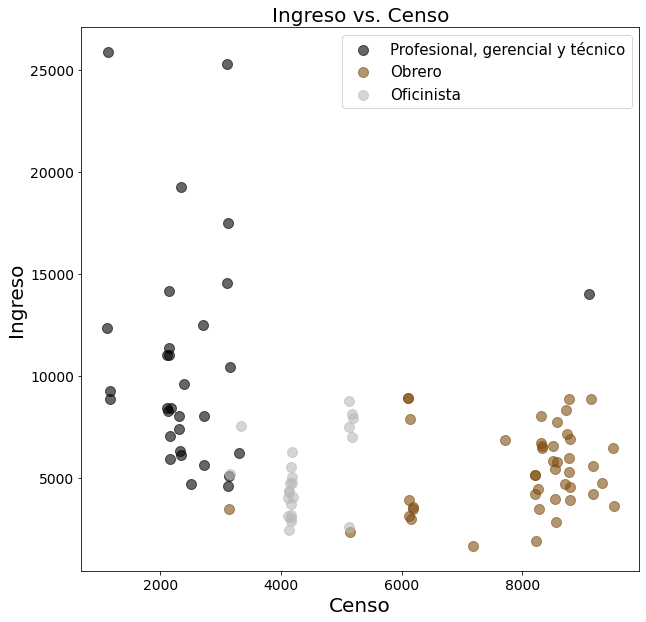

<Figure size 432x288 with 0 Axes>

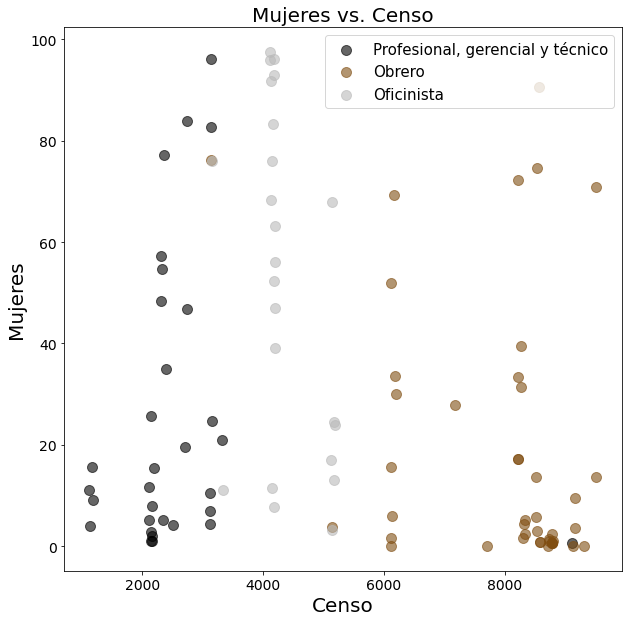

<Figure size 432x288 with 0 Axes>

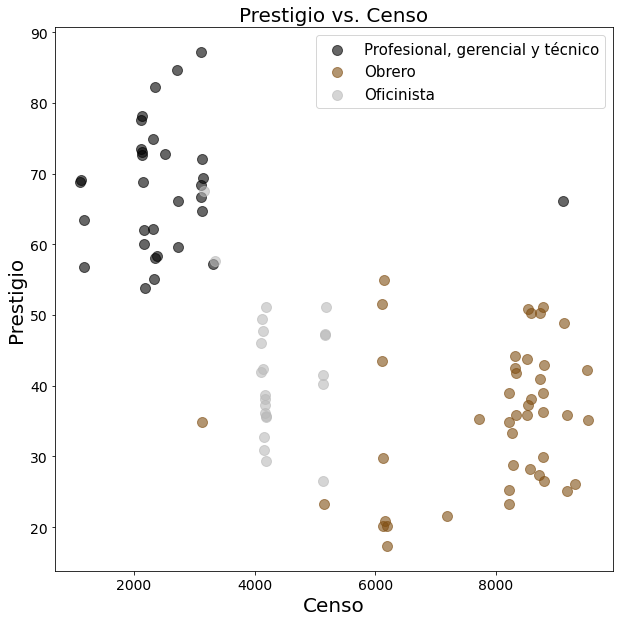

<Figure size 432x288 with 0 Axes>

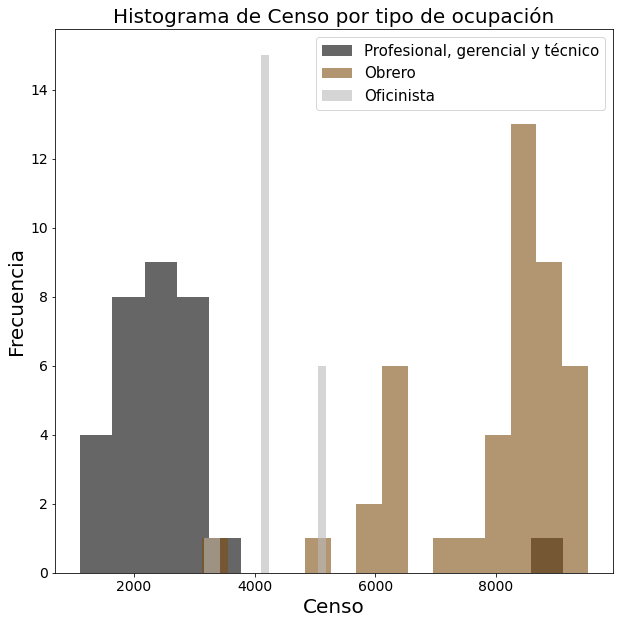

In [12]:
label = "Tipo"
targets = ["Profesional, gerencial y técnico", "Obrero", "Oficinista"]
colors = ["#000000", "#804e12", "#bababa"]
#colors = ["green", "red", "blue"]
columns = df.columns[range(1,len(df.columns)-1)]

for x_col in columns:
    for y_col in columns:
        plot(df, x_col, y_col, label, targets, colors)

## Educación

<Figure size 432x288 with 0 Axes>

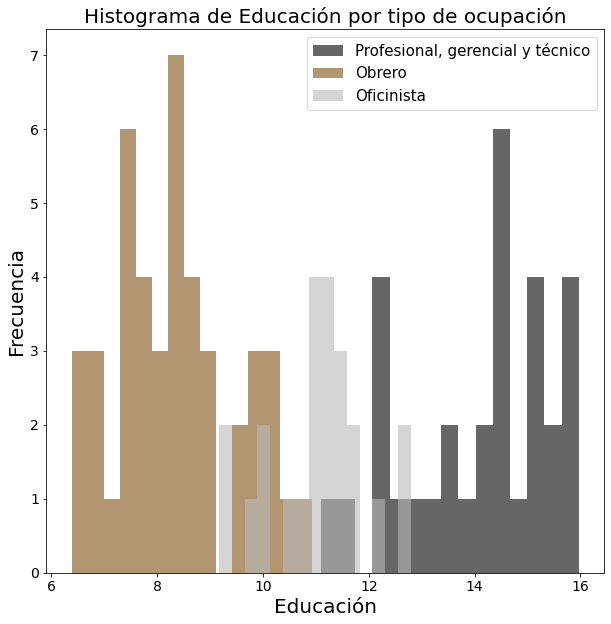

In [13]:
plot(df, "Educación", "Educación", label, targets, colors)

<Figure size 432x288 with 0 Axes>

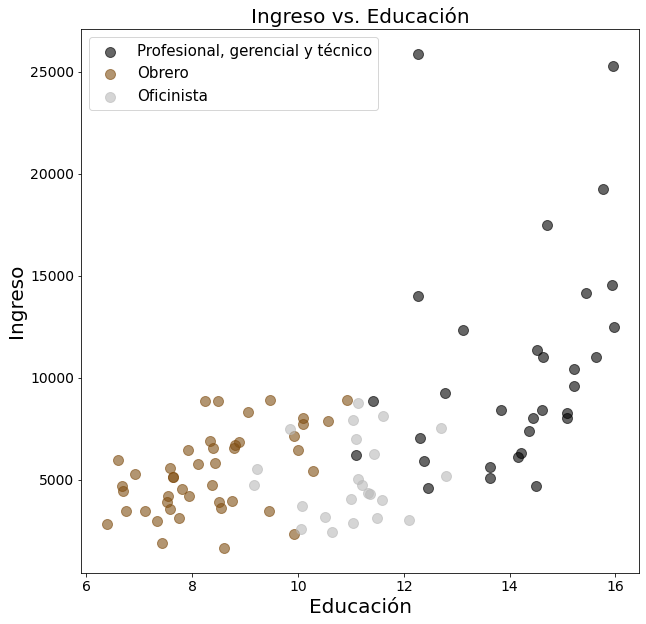

In [14]:
plot(df, "Educación", "Ingreso", label, targets, colors)

<Figure size 432x288 with 0 Axes>

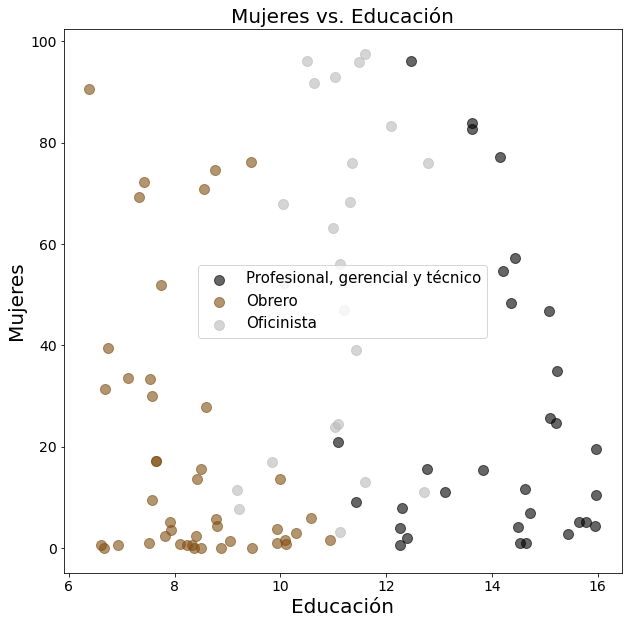

In [15]:
plot(df, "Educación", "Mujeres", label, targets, colors)

<Figure size 432x288 with 0 Axes>

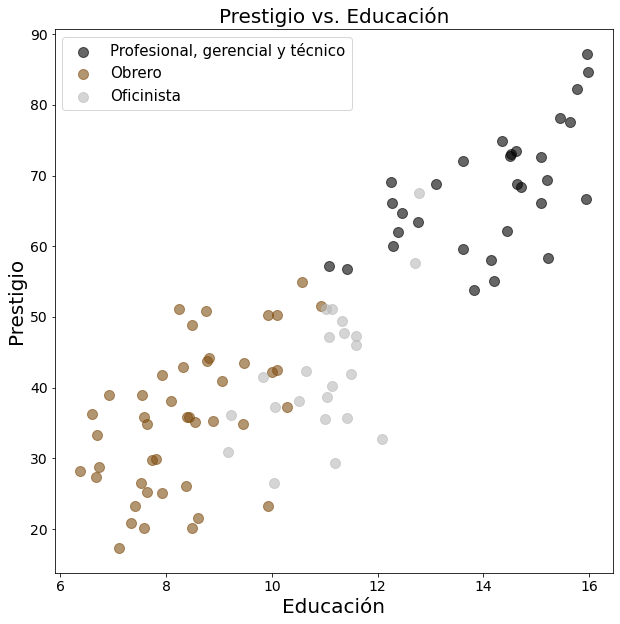

In [16]:
plot(df, "Educación", "Prestigio", label, targets, colors)

<Figure size 432x288 with 0 Axes>

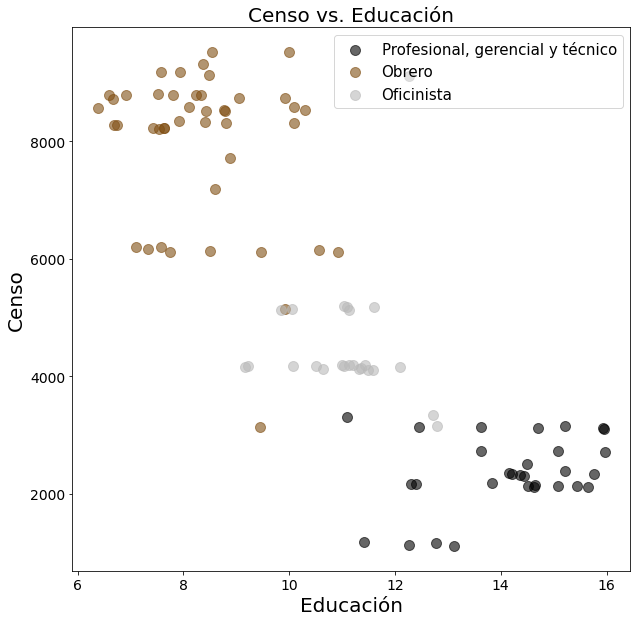

In [17]:
plot(df, "Educación", "Censo", label, targets, colors)

## Ingreso

<Figure size 432x288 with 0 Axes>

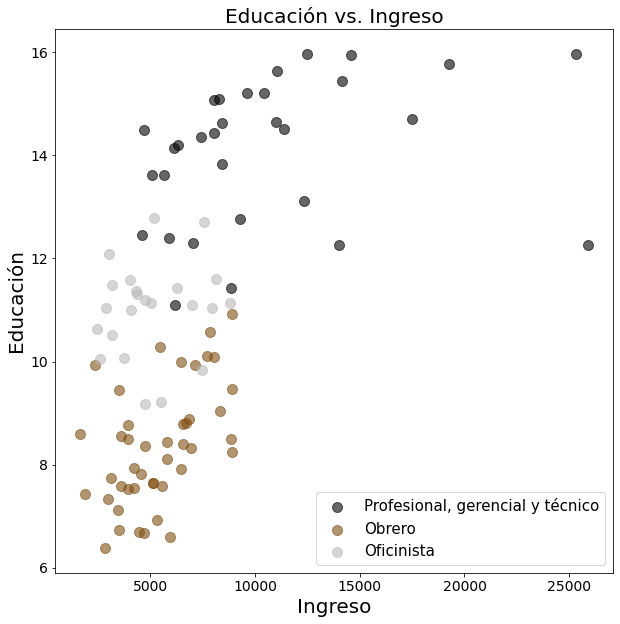

In [18]:
plot(df, "Ingreso", "Educación", label, targets, colors)

<Figure size 432x288 with 0 Axes>

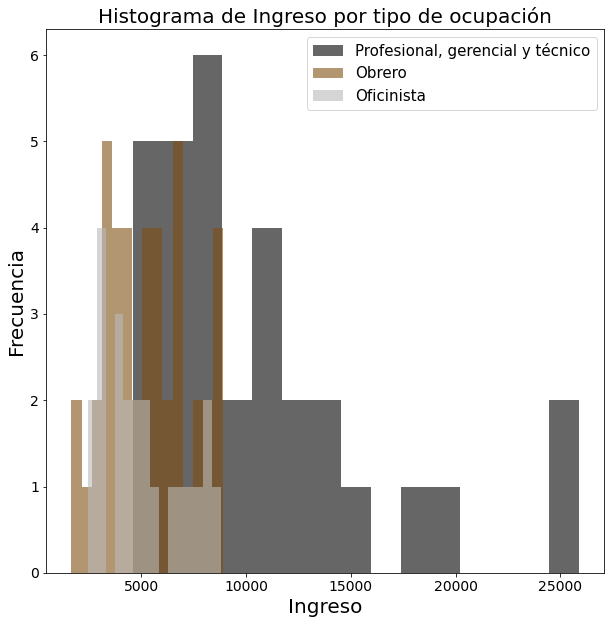

In [19]:
plot(df, "Ingreso", "Ingreso", label, targets, colors)

<Figure size 432x288 with 0 Axes>

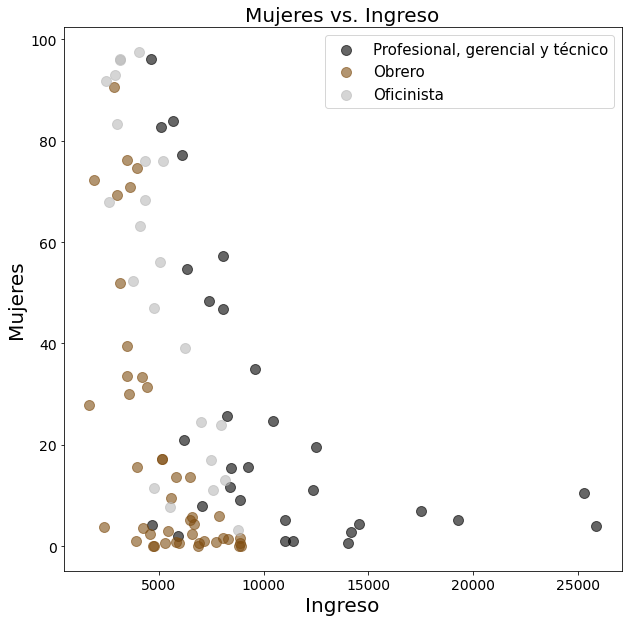

In [20]:
plot(df, "Ingreso", "Mujeres", label, targets, colors)

<Figure size 432x288 with 0 Axes>

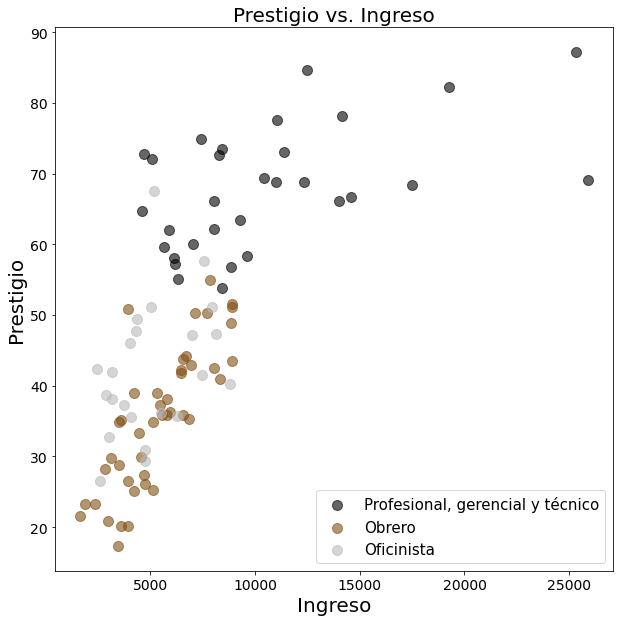

In [21]:
plot(df, "Ingreso", "Prestigio", label, targets, colors)

<Figure size 432x288 with 0 Axes>

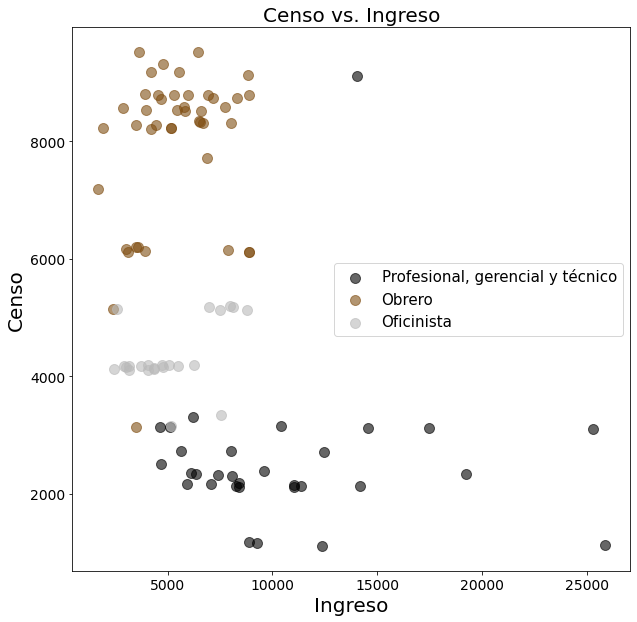

In [22]:
plot(df, "Ingreso", "Censo", label, targets, colors)

## Mujeres

<Figure size 432x288 with 0 Axes>

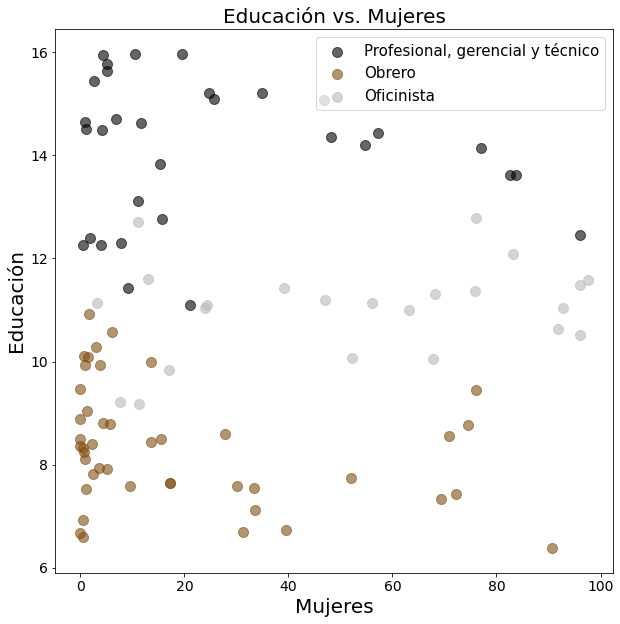

In [23]:
plot(df, "Mujeres", "Educación", label, targets, colors)

<Figure size 432x288 with 0 Axes>

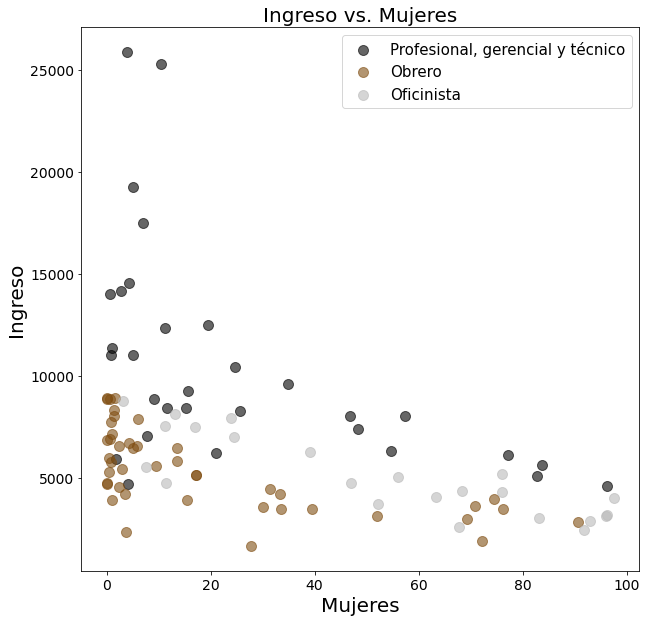

In [24]:
plot(df, "Mujeres", "Ingreso", label, targets, colors)

<Figure size 432x288 with 0 Axes>

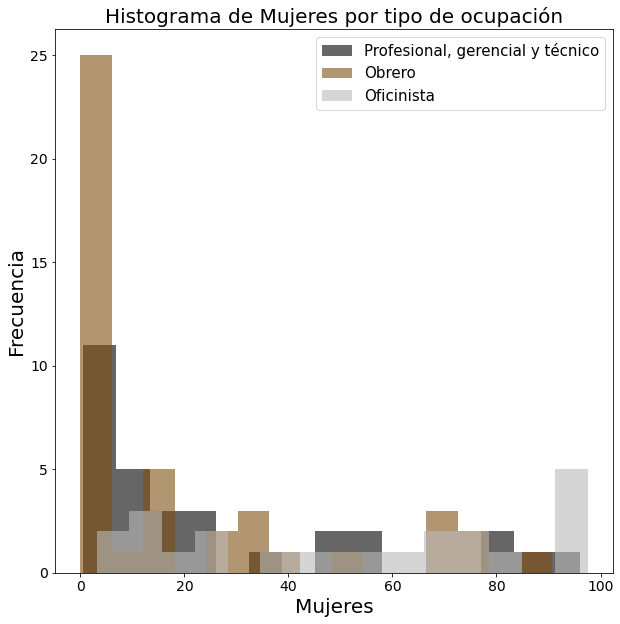

In [25]:
plot(df, "Mujeres", "Mujeres", label, targets, colors)

<Figure size 432x288 with 0 Axes>

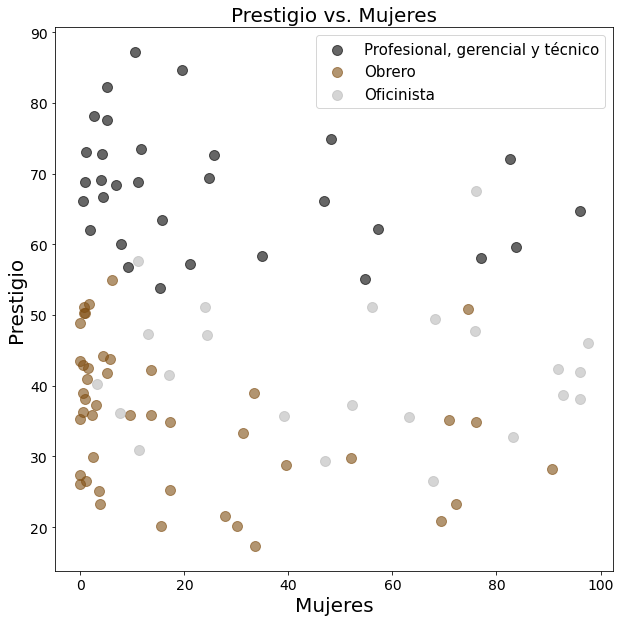

In [26]:
plot(df, "Mujeres", "Prestigio", label, targets, colors)

<Figure size 432x288 with 0 Axes>

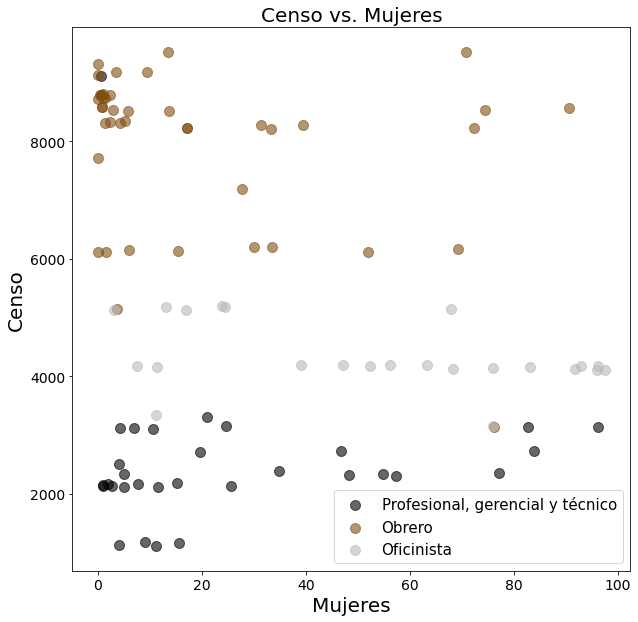

In [27]:
plot(df, "Mujeres", "Censo", label, targets, colors)

## Prestigio

<Figure size 432x288 with 0 Axes>

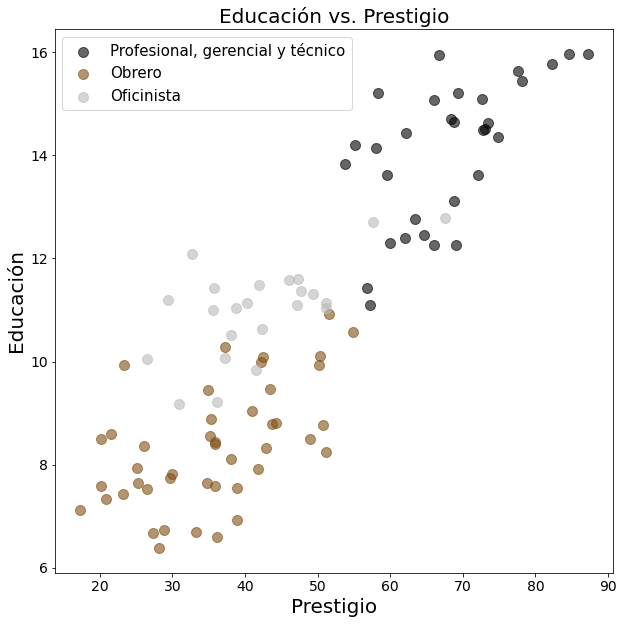

In [28]:
plot(df, "Prestigio", "Educación", label, targets, colors)

<Figure size 432x288 with 0 Axes>

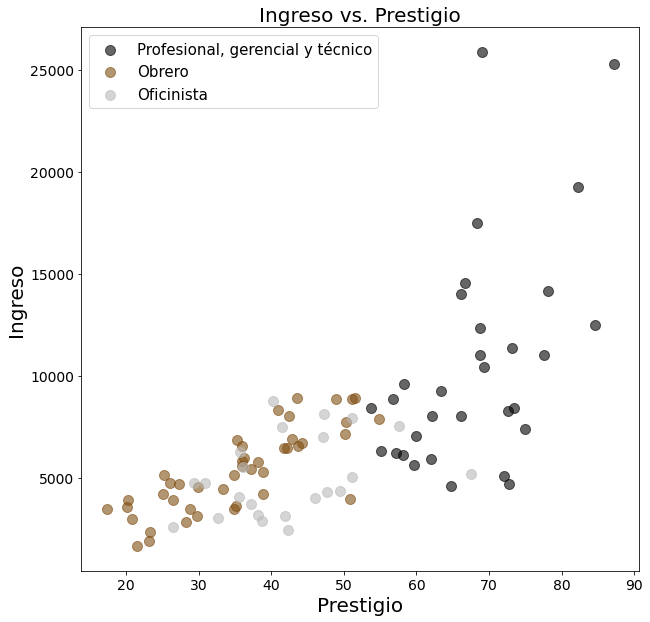

In [29]:
plot(df, "Prestigio", "Ingreso", label, targets, colors)

<Figure size 432x288 with 0 Axes>

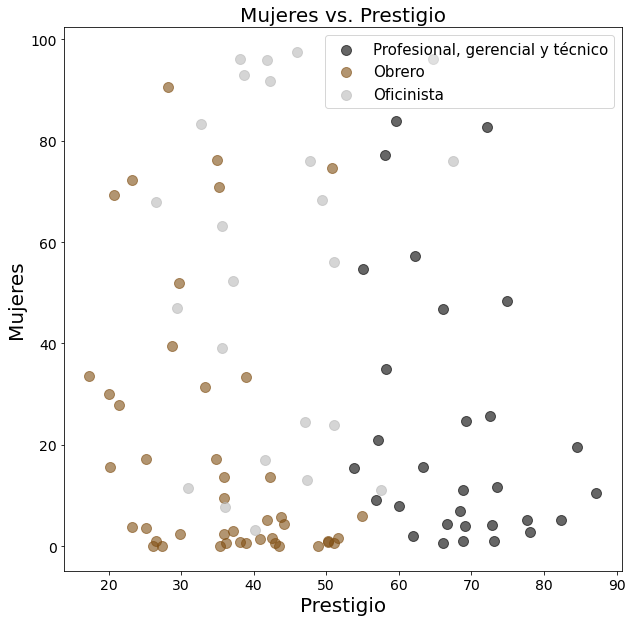

In [30]:
plot(df, "Prestigio", "Mujeres", label, targets, colors)

<Figure size 432x288 with 0 Axes>

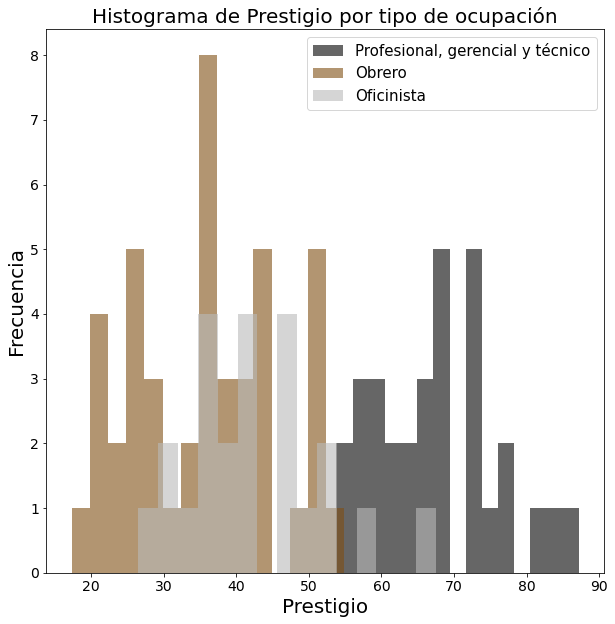

In [31]:
plot(df, "Prestigio", "Prestigio", label, targets, colors)

<Figure size 432x288 with 0 Axes>

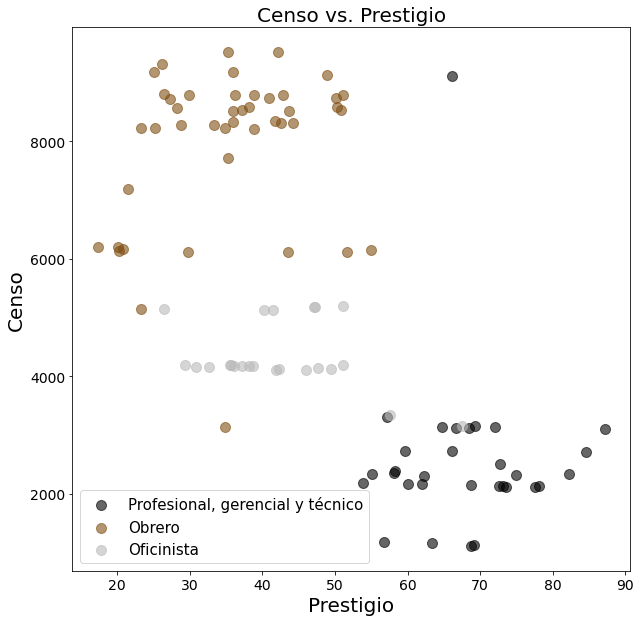

In [32]:
plot(df, "Prestigio", "Censo", label, targets, colors)

## Censo

<Figure size 432x288 with 0 Axes>

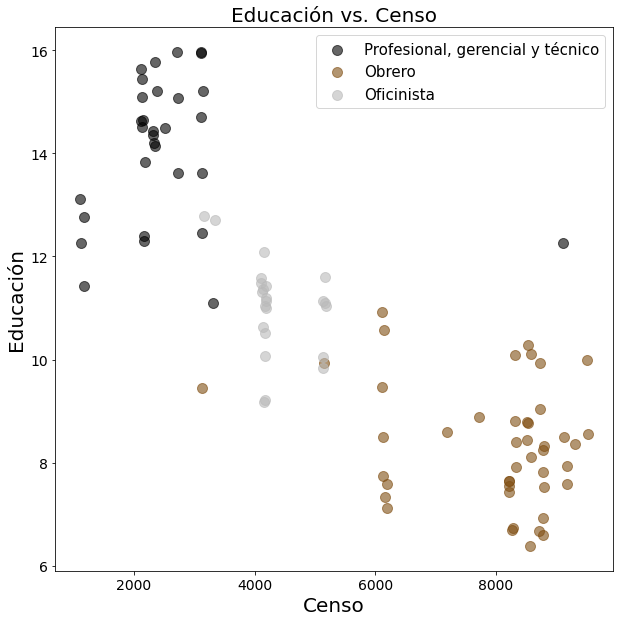

In [33]:
plot(df, "Censo", "Educación", label, targets, colors)

<Figure size 432x288 with 0 Axes>

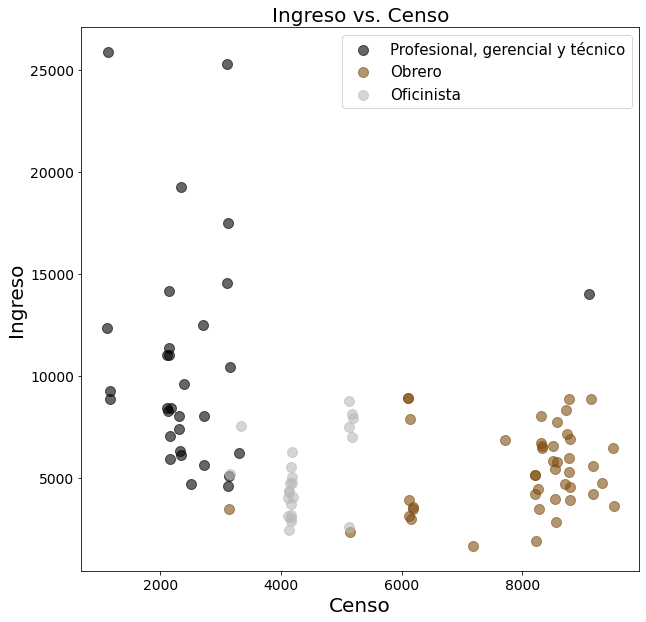

In [34]:
plot(df, "Censo", "Ingreso", label, targets, colors)

<Figure size 432x288 with 0 Axes>

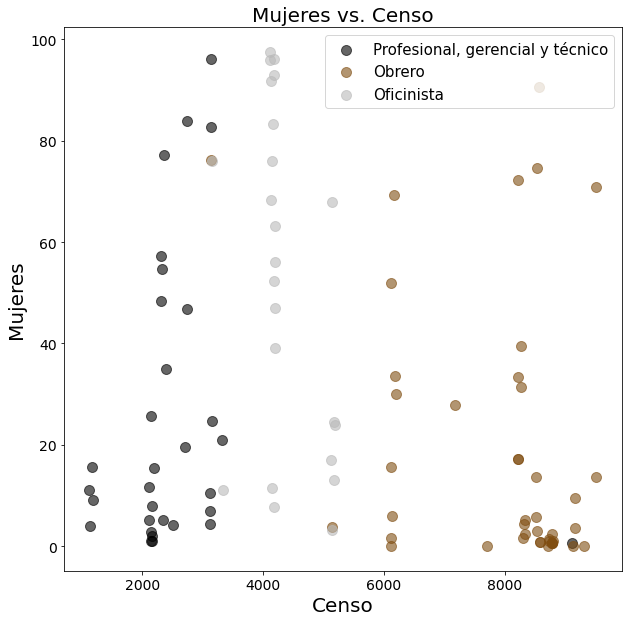

In [35]:
plot(df, "Censo", "Mujeres", label, targets, colors)

<Figure size 432x288 with 0 Axes>

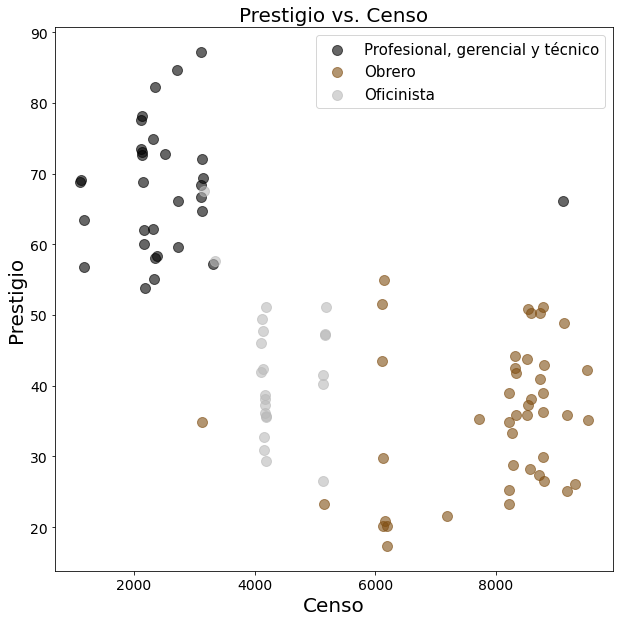

In [36]:
plot(df, "Censo", "Prestigio", label, targets, colors)

<Figure size 432x288 with 0 Axes>

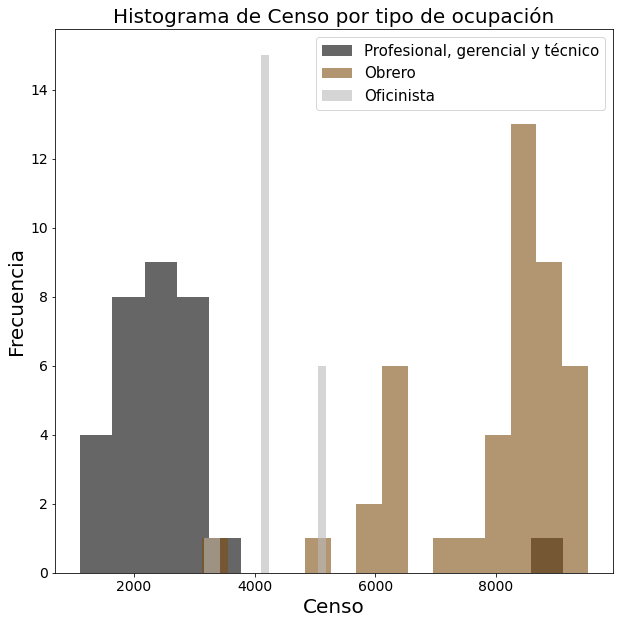

In [37]:
plot(df, "Censo", "Censo", label, targets, colors)